In [1]:
import torch
torch.__version__

'2.7.1+cu126'

# **[Andrej Karpathy on Tesla Using Pytorch](https://youtu.be/oBklltKXtDE?feature=shared)**

# Tensors?
- To represent data numerically
- Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.
- Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. 
(Tutorial from pytorch https://docs.pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html#:~:text=Tensors%20are%20a%20specialized%20data,GPUs%20or%20other%20hardware%20accelerators.)
- Tensors are also optimized for automatic differentiation(Autograd)
- Tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data  (see Bridge with NumPy)
- By default, tensors are created on the CPU. We need to explicitly move tensors to the accelerator using the .to method (after checking for accelerator availability). Keep in mind that copying large tensors across devices can be expensive in terms of time and memory!


### Creating Tensors

##### **Scalars**

In [2]:
# scalar (0 dimension)
scalar = torch.tensor(7)
print(scalar)
print(scalar.ndim) #to print dimension
print(scalar.item()) #to retrieve number
print(scalar.shape) #empty shape

tensor(7)
0
7
torch.Size([])


##### **Vectors**

In [4]:
# vector (single dimension)
vector = torch.tensor([7,8])
print(vector)
print(vector.shape) #how many elements are there
print(vector.ndim) #dimension

tensor([7, 8])
torch.Size([2])
1


##### **Matrices**

In [5]:
# matrix (two dimensions)
MATRIX = torch.tensor([[7,8],
                       [9,10]])
print(MATRIX)
print(MATRIX.ndim) #dimension
print(MATRIX.shape) #row*column 

tensor([[ 7,  8],
        [ 9, 10]])
2
torch.Size([2, 2])


##### **Tensors**

In [10]:
# Tensor
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
print(TENSOR)
print(TENSOR.ndim)
print(TENSOR.shape)

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])
3
torch.Size([1, 3, 3])


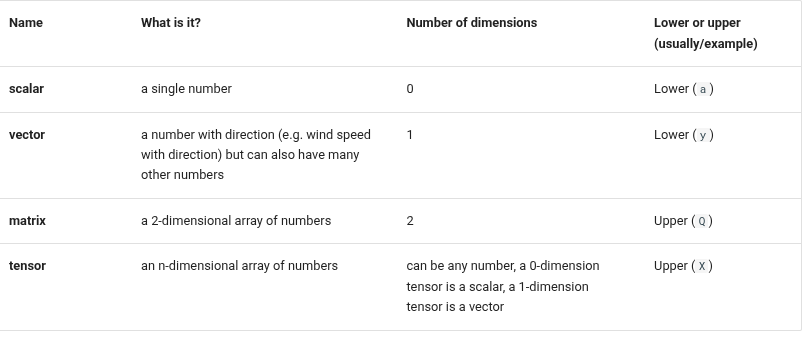
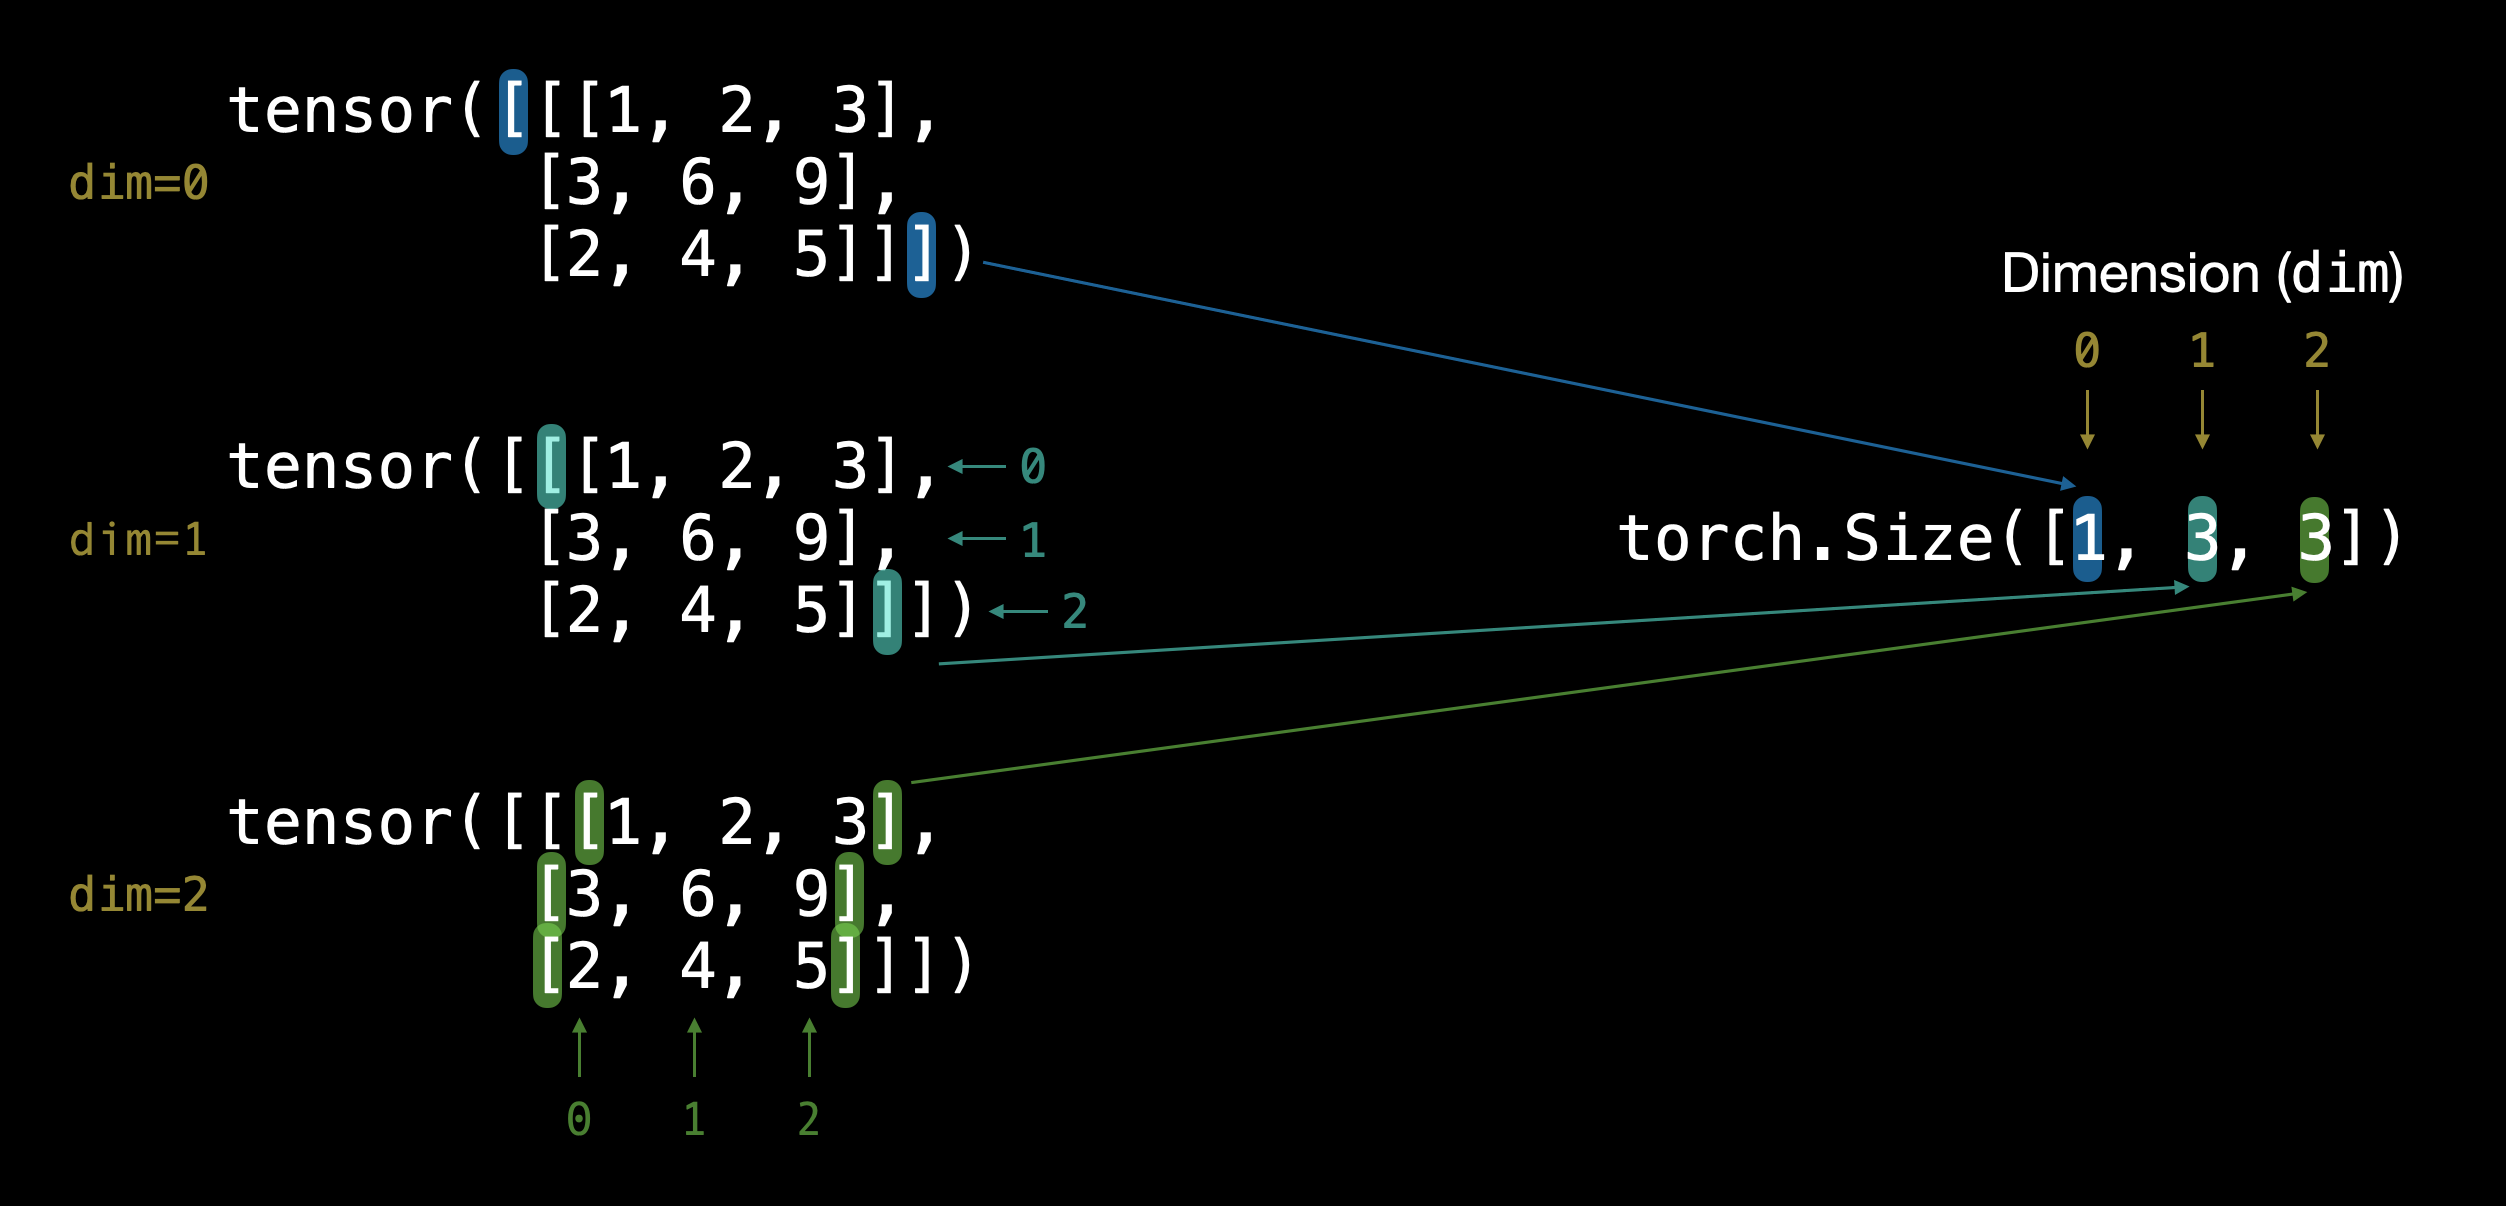

### Random Tensors
- Initialize model with random tensors in machine learning/

In [12]:
random_tensor = torch.rand(size=(3,4))
print(random_tensor)
print(random_tensor.ndim)
print(random_tensor.shape)

tensor([[0.2483, 0.0524, 0.7749, 0.2812],
        [0.1540, 0.0038, 0.0641, 0.1504],
        [0.4160, 0.6555, 0.1880, 0.8863]])
2
torch.Size([3, 4])


### Zeros and ones
- This happens a lot with masking (like masking some of the values in one tensor with zeros to let a model know not to learn them)

In [13]:
zeros = torch.zeros(size=(1,3,3))
print(zeros)
print(zeros.ndim)
print(zeros.shape)
print(zeros.dtype)

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])
3
torch.Size([1, 3, 3])
torch.float32


In [14]:
ones = torch.ones(size=(1,3,3))
print(ones)
print(ones.ndim)
print(ones.shape)

tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])
3
torch.Size([1, 3, 3])


### creating a range and tensors like

In [15]:
#returns a vector of range of numbers
zero_to_ten = torch.arange(start=0, end=10, step=1)
print(zero_to_ten)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [16]:
#creating a tensor like above but with zeros and ones
ten_zeros = torch.zeros_like(input=zero_to_ten)
print(ten_zeros)
ten_ones= torch.ones_like(input=zero_to_ten)
print(ten_ones)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


### Tensor datatypes
- Data types in pytorch https://docs.pytorch.org/docs/stable/tensors.html#data-types
- `torch.float32` or `torch.float` -> 32-bit floating point(common types used in deep learning)
- `torch.float16` or `torch.half` -> 16-bit floating point
- `torch.float64` or `torch.double` -> 64-bit floating point
- Different datatypes represent different **precision in computing**
- So lower precision datatypes are generally faster to compute on but sacrifice some performance on evaluation metrics like accuracy (faster to compute but less accurate)

In [17]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded 

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

In [18]:
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16) # torch.half would also work

float_16_tensor.dtype

torch.float16

### getting information form tensors

**Alaways question these three things(what type, what shape, and where) for debugging issues in tensors**

In [20]:
random_tensor = torch.rand((3,2),dtype=torch.float16)
print(random_tensor.shape)
print(random_tensor.dtype)
print(random_tensor.device)

torch.Size([3, 2])
torch.float16
cpu


### Manipulating Tensors

#### Basic Operations

In [37]:

# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [38]:
# Multiply it by 10
tensor * 10

tensor([10, 20, 30])

In [39]:
# Tensors don't change unless reassigned
tensor

tensor([1, 2, 3])

In [40]:
# Subtract and reassign
tensor = tensor - 10
tensor

tensor([-9, -8, -7])

In [41]:
# Can also use torch functions
torch.multiply(tensor, 10)

tensor([-90, -80, -70])

In [42]:
tensor * tensor

tensor([81, 64, 49])

#### matrix multiplication
- `torch.matmul()` is faster. So, use it.
- visualize matrix multiplication **http://matrixmultiplication.xyz/**

In [54]:
tensor = torch.tensor([1, 2, 3])
torch.matmul(tensor,tensor)

tensor(14)

In [55]:
tensor @ tensor

tensor(14)

for vectors,
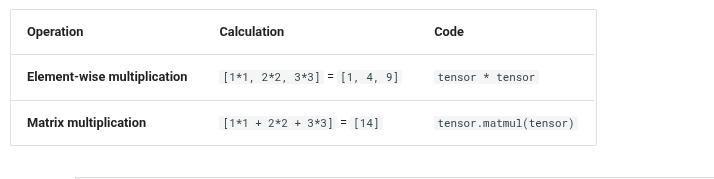

In [52]:
tensor_A = torch.tensor([[1,2],
                         [2,3],
                         [3,4]], dtype=torch.float32)

tensor_B = torch.tensor([[5,2],
                         [2,6],
                         [3,10]], dtype=torch.float32)

tensor_A @ tensor_B

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [53]:
tensor_A.T @ tensor_B

tensor([[18., 44.],
        [28., 62.]])

In [59]:
# torch.mm is a shortcut for matmul but don't work with vectors as before
torch.mm(tensor_A.T, tensor_B) 

tensor([[18., 44.],
        [28., 62.]])

#### implemeting linear layer

In [3]:
tensor_A = torch.tensor([[1,2],
                         [3,4],
                         [5,6]], dtype=torch.float32)

# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)

linear = torch.nn.Linear(in_features=2, out_features=6) #uses matrix multiplication

output = linear(tensor_A)

print(f"Input shape: {tensor_A.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


#### finding min, max, mean, sum, etc(aggregation)

In [4]:
x = torch.arange(start=0, end=100, step=10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [6]:
print(x.min())
print(x.max())
print(x.type(torch.float32).mean()) #wont work without float datatype
print(x.sum())

tensor(0)
tensor(90)
tensor(45.)
tensor(450)


In [7]:
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(90), tensor(0), tensor(45.), tensor(450))

#### positional min/max

In [8]:
# Returns index of max and min values
print(f"Index where max value occurs: {x.argmax()}")
print(f"Index where min value occurs: {x.argmin()}")

Index where max value occurs: 9
Index where min value occurs: 0


#### change tensor datatype

In [9]:
x.dtype

torch.int64

In [11]:
x = x.type(torch.float32)
x

tensor([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.])

In [13]:
x = x.type(torch.int8)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

#### Reshaping, stacking, sqeezing, unsqueezing

Change the dimension of tensors without changing the actual values within them  
- `view` means, the new tensor shares the same data as original and changing new also changes old
 
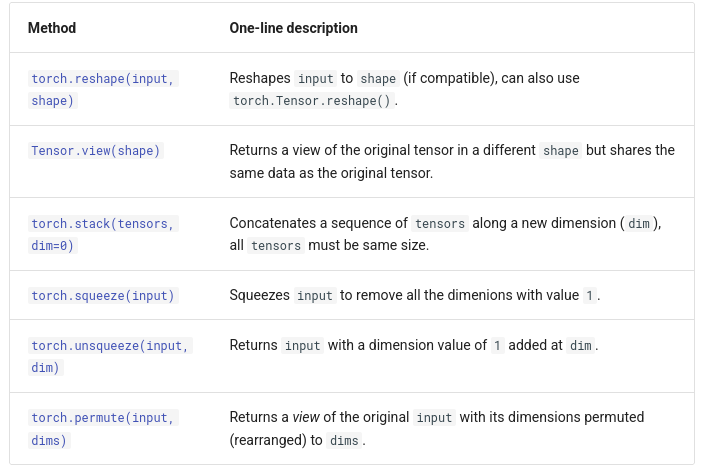

In [1]:
import torch

/Users/dhurbabaral/Documents/pytorch/learnpytorch/pytorch-venv/lib/python3.9/site-packages/torch/_subclasses/functional_tensor.py:279: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:81.)
  cpu = _conversion_method_template(device=torch.device("cpu"))


In [2]:
x = torch.arange(start=0, end=10, step=1)
x, x.shape

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), torch.Size([10]))

In [3]:
x_reshaped = x.reshape([1,10]) #add extra dimenton
x_reshaped

tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [4]:
# Change view (keeps same data as original but changes view)
# See more: https://stackoverflow.com/a/54507446/7900723
z = x.view(1, 10)
z, z.shape

(tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]), torch.Size([1, 10]))

In [5]:
z,x

(tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [6]:
# Changing z changes x
z[:, 0] = 5
z, x

(tensor([[5, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 tensor([5, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [7]:
x_stacked = torch.stack([x,x,x,x], dim=0) #adding each as new row
x_stacked

tensor([[5, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [5, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [5, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [5, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [8]:
x_stacked = torch.stack([x,x,x,x], dim=1) #adding each as new column
x_stacked

tensor([[5, 5, 5, 5],
        [1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3],
        [4, 4, 4, 4],
        [5, 5, 5, 5],
        [6, 6, 6, 6],
        [7, 7, 7, 7],
        [8, 8, 8, 8],
        [9, 9, 9, 9]])

In [9]:
x_reshaped = x.reshape([1,10]) #add extra dimension (1)
x_sqeezed = torch.squeeze(x_reshaped) #remove extra dimension (1)
x, x_reshaped, x_sqeezed

(tensor([5, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 tensor([[5, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 tensor([5, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [10]:
x_unsqeezed = torch.unsqueeze(x_sqeezed, dim=0) #add one(1) extra dimension to make size (1,10)
x_unsqeezed

tensor([[5, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [11]:
x_unsqeezed = torch.unsqueeze(x_sqeezed, dim=1) #add one(1) extra dimension to make size (10,1)
x_unsqeezed

tensor([[5],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])

In [29]:
x_original = torch.rand(size=(224,224,3))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2,0,1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


#### Indexing (selecting data from tensors)
- **Number vako ma no bracket**

In [39]:
# Create a tensor 
import torch
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [35]:
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [36]:
x[0][0]

tensor([1, 2, 3])

In [37]:
x[0][0][0]

tensor(1)

In [27]:
# Get all values of 0th dimension and the 0 index of 1st dimension
x[:,0]

tensor([[1, 2, 3]])

In [38]:
# Get all values of 0th & 1st dimensions but only index 1 of 2nd dimension
x[:,:,1]

tensor([[2, 5, 8]])

In [40]:
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
x[:,1,1]

tensor([5])

In [32]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension 
x[0,0,:]

tensor([1, 2, 3])

#### Pytorch tensors and numpy
`torch.from_numpy(ndarray)` - NumPy array -> PyTorch tensor.  
`torch.Tensor.numpy()` - PyTorch tensor -> NumPy array.

In [1]:
# NumPy array to tensor
import torch
import numpy as np

array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array).type(torch.float32) #because the default in numpy array is float64 but in pytorch tensor is float32
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]), tensor([1., 2., 3., 4., 5., 6., 7.]))

In [4]:
array = array + 1
array, tensor

(array([3., 4., 5., 6., 7., 8., 9.]), tensor([1., 2., 3., 4., 5., 6., 7.]))

In [5]:
# Tensor to NumPy array
tensor = torch.ones(7) # create a tensor of ones with dtype=float32
numpy_tensor = tensor.numpy() # will be dtype=float32 unless changed
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [6]:
tensor = tensor+1
numpy_tensor, tensor

(array([1., 1., 1., 1., 1., 1., 1.], dtype=float32),
 tensor([2., 2., 2., 2., 2., 2., 2.]))

#### Reproducibility (trying to take the random out of random)
define seed before defining the tensors

In [41]:
tensor_A = torch.rand(3,4)
tensor_B = torch.rand(3,4)

print(tensor_A)
print(tensor_B)

print(tensor_A == tensor_B)

tensor([[8.0881e-01, 9.6752e-01, 4.6132e-01, 9.3091e-01],
        [2.9558e-04, 2.5018e-01, 7.7338e-01, 4.3321e-02],
        [5.7862e-01, 5.5185e-01, 3.2781e-01, 9.6442e-01]])
tensor([[0.1947, 0.2987, 0.3937, 0.7215],
        [0.2780, 0.3473, 0.7768, 0.5195],
        [0.8866, 0.2984, 0.4467, 0.1528]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [42]:
torch.manual_seed(seed=42)
tensor_A = torch.rand(3,4)

torch.manual_seed(seed=42)
tensor_B = torch.rand(3,4)

print(tensor_A, tensor_B)
tensor_A == tensor_B

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]]) tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [43]:
torch.manual_seed(seed=0)
tensor_A = torch.rand(3,4)

torch.manual_seed(seed=0)
tensor_B = torch.rand(3,4)

print(tensor_A, tensor_B)
tensor_A == tensor_B

tensor([[0.4963, 0.7682, 0.0885, 0.1320],
        [0.3074, 0.6341, 0.4901, 0.8964],
        [0.4556, 0.6323, 0.3489, 0.4017]]) tensor([[0.4963, 0.7682, 0.0885, 0.1320],
        [0.3074, 0.6341, 0.4901, 0.8964],
        [0.4556, 0.6323, 0.3489, 0.4017]])


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [44]:
torch.manual_seed(seed=42)
tensor_A = torch.rand(3,4)

torch.manual_seed(seed=42)
tensor_B = torch.rand(3,4)

print(tensor_A, tensor_B)
tensor_A == tensor_B

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]]) tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

#### Running tensors on GPUs (and making faster computations)¶

1. Getting a GPU  
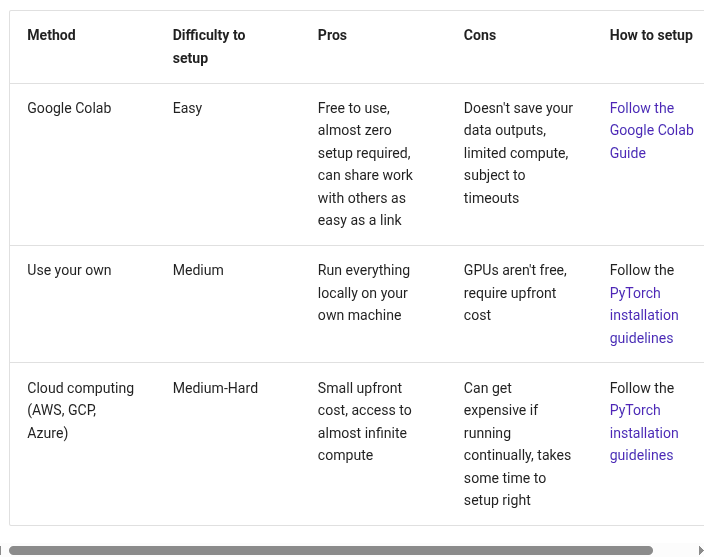  
**Blog to purchase best GPU for deep learning** - https://timdettmers.com/2023/01/30/which-gpu-for-deep-learning/  
**What is CUDA:** CUDA is a computing platform and API that helps allow GPUs be used for general purpose computing & not just graphics


- Which GPU to buy for Deep Learning : **https://timdettmers.com/2023/01/30/which-gpu-for-deep-learning/**

In [2]:
# to check gpu (to query the NVIDIA System Management Interface (nvidia-smi))
!nvidia-smi

zsh:1: command not found: nvidia-smi


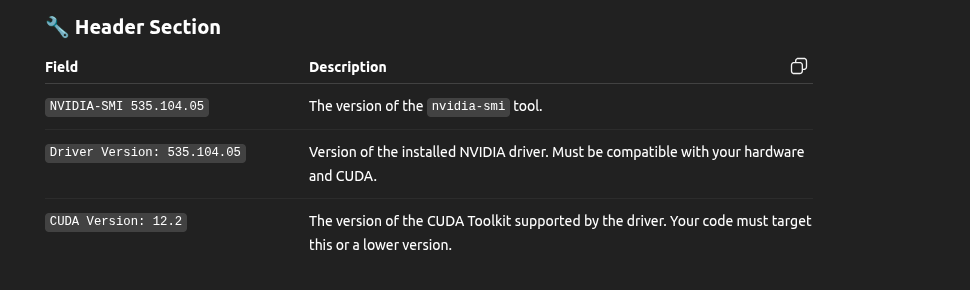  
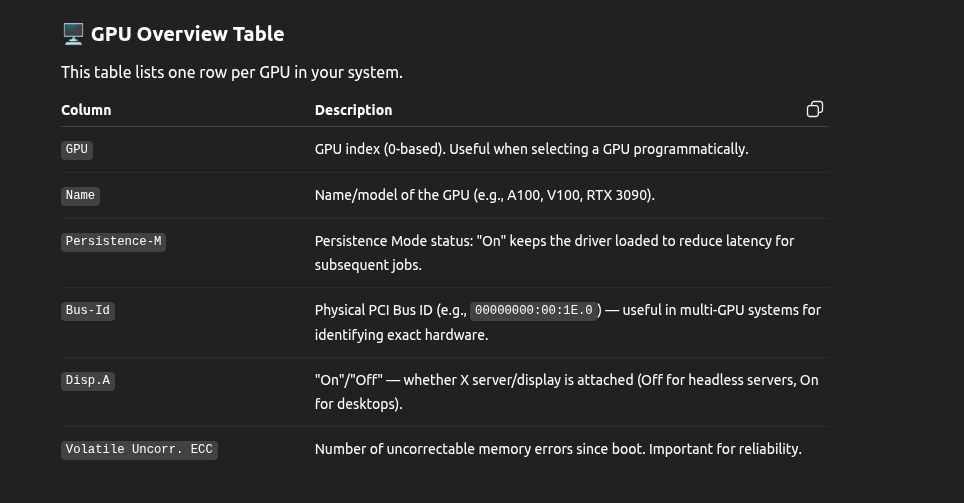  
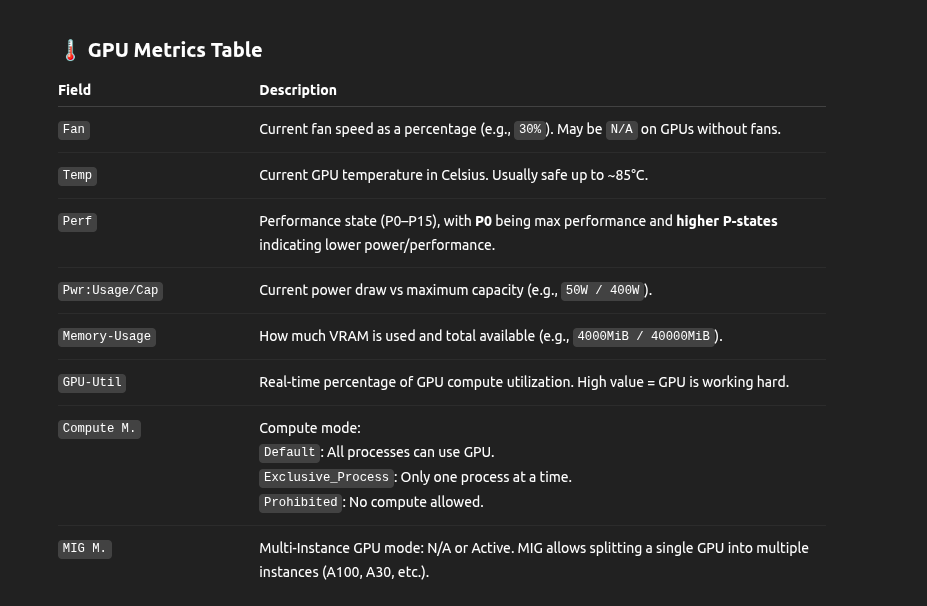  
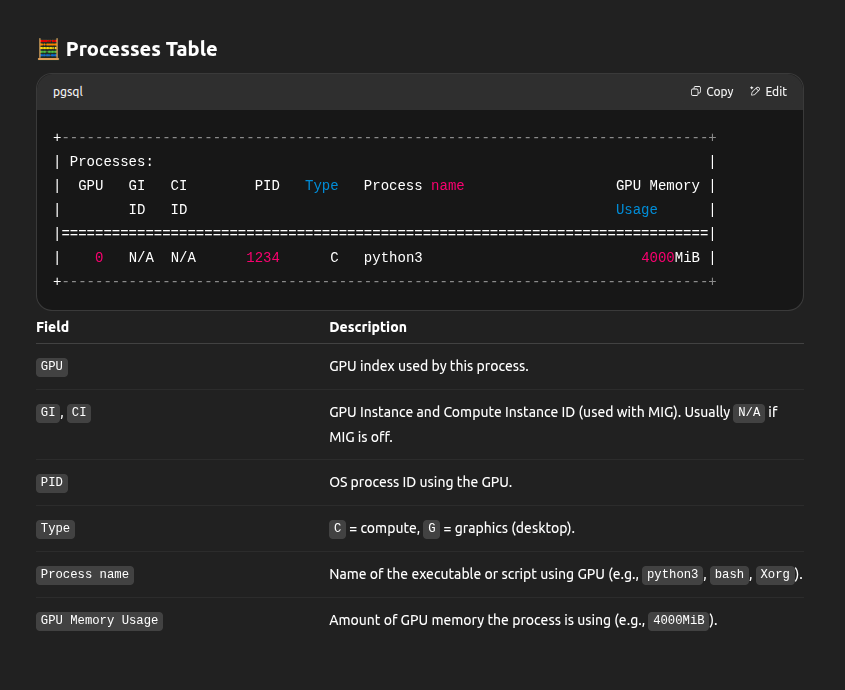

2. Getting pytorch to run on the GPU  
- Using **`torch.cuda()`** package
- In PyTorch, **it's best practice to write device agnostic code**. This means code that'll run on CPU (always available) or GPU (if available).
- If you want to do faster computing you can use a GPU but if you want to do much faster computing, you can use multiple GPUs.
- In order to **run PyTorch on Apple's M1/M2/M3 GPUs** you can use the **`torch.backends.mps`** module.


In [4]:
torch.backends.mps

<module 'torch.backends.mps' from '/Users/dhurbabaral/Documents/pytorch/learnpytorch/pytorch-venv/lib/python3.9/site-packages/torch/backends/mps/__init__.py'>

In [17]:
#check for GPU
torch.cuda.is_available()

True

In [18]:
#set the device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [20]:
#count the number of GPUs
torch.cuda.device_count()

1


Knowing the number of GPUs PyTorch has access to is helpful incase you wanted to run a specific process on one GPU and another process on another (PyTorch also has features to let you run a process across all GPUs).

In [5]:
# Check for Apple Silicon GPU
torch.backends.mps.is_available()

True

In [6]:
# Set device type
device = "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

In [7]:
if torch.cuda.is_available():
    device = "cuda" # Use NVIDIA GPU (if available)
elif torch.backends.mps.is_available():
    device = "mps" # Use Apple Silicon GPU (if available)
else:
    device = "cpu" # Default to CPU if no GPU is available

3. Putting tensors (and models) on the GPU
- Putting a tensor on GPU using to(device) (e.g. some_tensor.to(device)) returns a copy of that tensor, e.g. the same tensor will be on CPU and GPU. To overwrite tensors, reassign them: **`some_tensor = some_tensor.to(device)`**
- Notice the second tensor has device='cuda:0', this means it's stored on the 0th GPU available (GPUs are 0 indexed, if two GPUs were available, they'd be 'cuda:0' and 'cuda:1' respectively, up to 'cuda:n').

In [8]:
#creating a tensor(default on CPU)
tensor = torch.tensor([1,2,3])

#tensor not in GPU
print(tensor, tensor.device)

#move tensor to GPU(if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3], device='mps:0')

4. Moving tensors back to the CPU  
- you'll want to do this if you want to interact with your tensors with NumPy (NumPy does not leverage the GPU).

In [9]:
tensor_on_gpu.numpy()

TypeError: can't convert mps:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [10]:
tensor_back_to_cpu = tensor_on_gpu.cpu().numpy() #returns a copy of the GPU tensor in CPU memory so the original tensor is still on GPU.
tensor_back_to_cpu

array([1, 2, 3])

In [11]:
tensor_on_gpu

tensor([1, 2, 3], device='mps:0')